In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/adausdt_2022.csv")
df.head()

,Opentime,Open,High,Low,Close,Volume,Closetime,Quote asset volume,Number of trades,Taker by base,Taker buy quote,Ignore
0,2021-11-01 08:00:00,1.965,2.019,1.911,1.949,144061135.4,1635811199999,2.824457e+08,443944,71078236.0,1.394258e+08,0
1,2021-11-02 08:00:00,1.949,1.996,1.933,1.971,124263204.0,1635897599999,2.446304e+08,382592,64339347.3,1.267002e+08,0
2,2021-11-03 08:00:00,1.971,2.144,1.950,2.063,335561983.7,1635983999999,6.936646e+08,1237122,167743048.3,3.467647e+08,0
3,2021-11-04 08:00:00,2.063,2.103,1.933,1.983,174549100.4,1636070399999,3.509825e+08,586577,80789835.4,1.624612e+08,0
4,2021-11-05 08:00:00,1.983,2.017,1.959,1.982,108180863.7,1636156799999,2.150281e+08,346939,51873631.3,1.030921e+08,0


In [3]:
import tensorflow as tf

2022-11-19 00:58:10.000148: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-19 00:58:10.083274: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-19 00:58:10.404969: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-19 00:58:10.405003: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [4]:
split = int(len(df['Close']) * 0.8)
training_set = df.loc[:split,['Close']].values

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
training_set_scaled = scaler.fit_transform(training_set)

In [6]:
X_train, y_train = [], []

for i in range(14, split):
    X_train.append(training_set_scaled[i-14:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
class EarlyStopping(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('mae') < 0.03:
            print('\nMAE threshold reached. Training stopped')
            self.model.stop_training = True

early_stopping = EarlyStopping()

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [9]:
model = tf.keras.models.Sequential([
    Bidirectional(LSTM(50, return_sequences=True, input_shape = (X_train.shape[1], 1))),
    Dropout(0.2),
    Bidirectional(LSTM(50, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(50, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(50)),
    Dense(units=1, activation='linear')
])

model.compile(loss=tf.keras.losses.MeanSquaredError(),\
    optimizer='adam',\
    metrics=['mae'])
history = model.fit(X_train, y_train, epochs=100, callbacks=[early_stopping])

Epoch 1/100


2022-11-19 00:58:11.029752: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-19 00:58:11.048651: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-19 00:58:11.048795: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-19 00:58:11.049159: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

7/7 [==============================] - 6s 7ms/step - loss: 0.0488 - mae: 0.1740
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0128 - mae: 0.0907
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0085 - mae: 0.0769
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0056 - mae: 0.0575
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0053 - mae: 0.0596
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0049 - mae: 0.0501
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0044 - mae: 0.0543
Epoch 8/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0039 - mae: 0.0464
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0041 - mae: 0.0523
Epoch 10/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0038 - mae: 0.0472
Epoch 11/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0035 - mae: 0.045

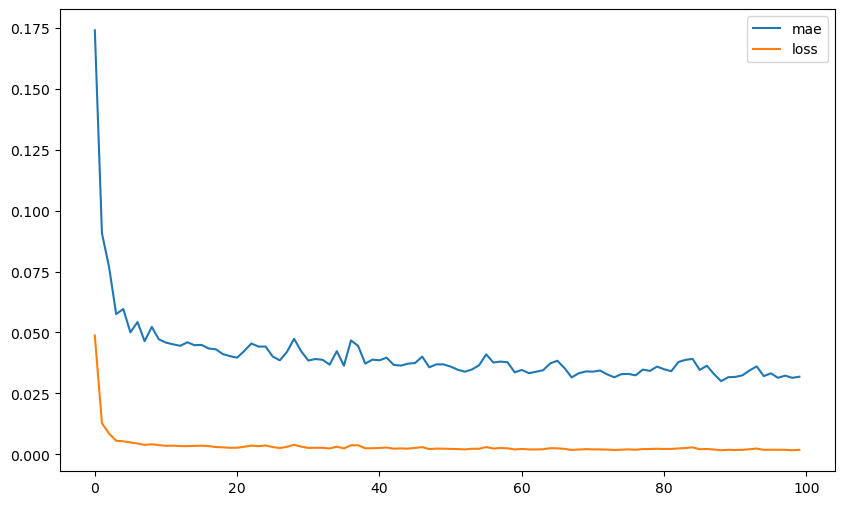

In [10]:
# plot MAE and loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()

In [11]:
real_prices = df.loc[split - 14:, ['Close']].values

In [12]:
inputs = scaler.transform(real_prices)
inputs

array([[ 0.03198412],
       [ 0.01229734],
       [ 0.        ],
       [ 0.0044116 ],
       [ 0.01400684],
       [ 0.06242418],
       [ 0.09385684],
       [ 0.05238778],
       [ 0.07196427],
       [ 0.05701996],
       [ 0.06060439],
       [ 0.06110069],
       [ 0.08409617],
       [ 0.08685342],
       [ 0.10157715],
       [ 0.09688982],
       [ 0.06496085],
       [ 0.05371126],
       [ 0.01863902],
       [ 0.00430131],
       [ 0.01461343],
       [ 0.04312341],
       [ 0.01080843],
       [ 0.01687438],
       [-0.00093747],
       [ 0.0155509 ],
       [ 0.01924562],
       [ 0.01362082],
       [ 0.00154406],
       [ 0.01290394],
       [ 0.02288519],
       [ 0.02305062],
       [ 0.0183633 ],
       [ 0.01599206],
       [ 0.00705856],
       [ 0.00529392],
       [ 0.00181979],
       [-0.00435646],
       [-0.00038602],
       [-0.00027573],
       [ 0.00711371],
       [ 0.00027573],
       [ 0.00314327],
       [ 0.01158046],
       [ 0.00523878],
       [ 0

In [13]:
X_test = []
for i in range(14, len(inputs)):
    X_test.append(inputs[i-14:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

2/2 [==============================] - 1s 4ms/step


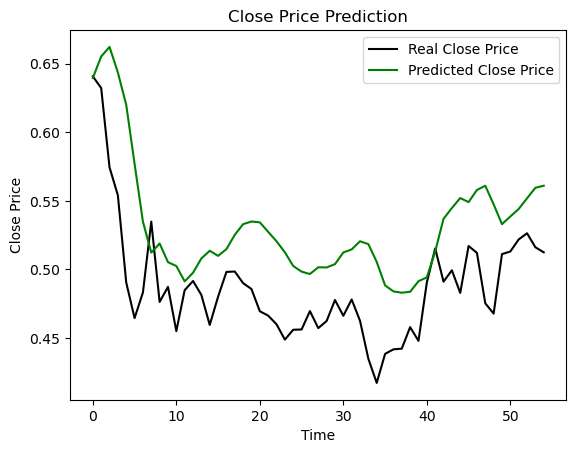

In [14]:
plt.plot(df.loc[split:,['Close']].values, color = 'black', label = 'Real Close Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Close Price')
plt.title('Close Price Prediction')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()